### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [1]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np
from pymoo.util.plotting import plot

Compiled Extensions:  True


In [2]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many.dtlz import DTLZ3
from pymoo.problems.many.dtlz import DTLZ4
from pymoo.problems.many.dtlz import DTLZ5
from pymoo.problems.many.dtlz import DTLZ6
from pymoo.problems.many.dtlz import DTLZ7
from pymoo.visualization.scatter import Scatter
from pymoo.optimize import minimize
from pymoo.indicators.hv import HV


In [3]:
# Hypervolume of pareto front of problem for n_vars = 2,3,5,10
problem_5 = DTLZ7(n_var=5)
original_pareto_front_2 = problem_5.pareto_front()
objective_nvar2_1 = [i[0] for i in original_pareto_front_2]
objective_nvar2_2 = [i[1] for i in original_pareto_front_2]
objective_nvar2_3 = [i[2] for i in original_pareto_front_2]
ref_vector_2 = [max(objective_nvar2_1),max(objective_nvar2_2),max(objective_nvar2_3)]
ind = HV(ref_point=ref_vector_2)
Hypervolume_nvar5 = ind(original_pareto_front_2)


problem_7 = DTLZ7(n_var=7)
original_pareto_front_3 = problem_7.pareto_front()
objective_nvar3_1 = [i[0] for i in original_pareto_front_3]
objective_nvar3_2 = [i[1] for i in original_pareto_front_3]
objective_nvar3_3 = [i[2] for i in original_pareto_front_3]
ref_vector_3 = [max(objective_nvar3_1),max(objective_nvar3_2),max(objective_nvar3_3)]
ind = HV(ref_point=ref_vector_3)
Hypervolume_nvar7 = ind(original_pareto_front_3)


problem_10 = DTLZ7(n_var=10)
original_pareto_front_5 = problem_10.pareto_front()
objective_nvar5_1 = [i[0] for i in original_pareto_front_5]
objective_nvar5_2 = [i[1] for i in original_pareto_front_5]
objective_nvar5_3 = [i[2] for i in original_pareto_front_5]
ref_vector_5 = [max(objective_nvar5_1),max(objective_nvar5_2),max(objective_nvar5_3)]
ind = HV(ref_point=ref_vector_5)
Hypervolume_nvar10 = ind(original_pareto_front_5)



n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  1.2111403467 |  2.8954842905 |  0.000000E+00 |  9.5653419595 |  2.8770626898
     2 |      200 |     16 |  0.8620990895 |  2.5103141383 |  0.000000E+00 |  8.3165544514 |  2.1991163815
     3 |      300 |     19 |  0.5293264811 |  1.9426645023 |  0.0059527844 |  6.3532333672 |  1.1484857940
     4 |      400 |     23 |  0.4623176597 |  1.2728145785 |  0.0095551306 |  4.0670378451 |  1.0869980472
     5 |      500 |     26 |  0.4659762123 |  1.0871779870 |  0.0433095307 |  3.4663468565 |  0.9936422532
     6 |      600 |     30 |  0.4448002370 |  0.5592499903 |  0.0444325529 |  1.6835368070 |  0.9453342465
     7 |      700 |     47 |  0.3601379783 |  0.5208363399 |  0.0533369824 |  1.5394170414 |  0.7754962457
     8 |      800 |     55 |  0.2949627861 |  0.4388293752 |  0.0692813138 |  1.2783368765 |  0.6664118557
     9 |      900 |     49 |  0.25831

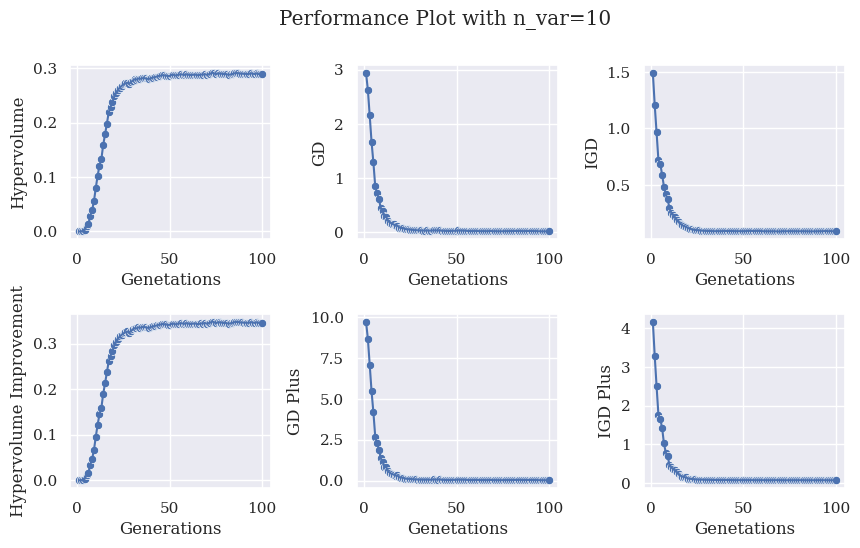

Max values of Hypervolume is 0.29198612266210133 
 , Best value of GD is 0.014558149845967764 
 , Best value of IGD is 
 0.08916310439140057 Best value of GD+ is 0.017364036285089063 , Best value of IGD+ is 0.0700881653035937


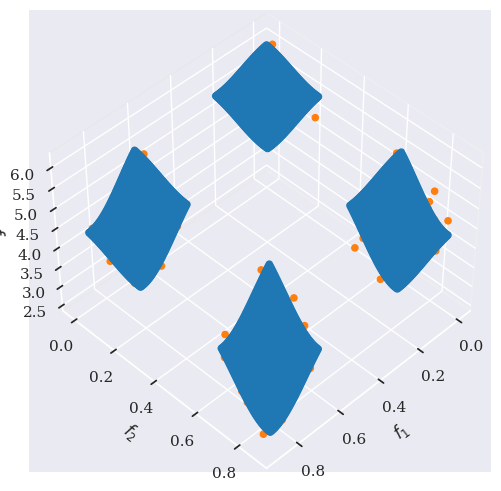

In [6]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
plot = Scatter()
plot.add(original_pareto_front)
plot.add(model_list[0].F)
plot.show()
#plt.show()

#### SPEA2 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     17 |  1.8631056200 |  2.8910573236 |  0.000000E+00 |  9.4768193205 |  5.8569546526
     2 |      200 |     22 |  1.4275173977 |  2.9683895858 |  0.000000E+00 |  9.8345309710 |  4.2068834492
     3 |      300 |     26 |  1.1318623443 |  2.3533718918 |  0.000000E+00 |  7.7716859736 |  2.9983582979
     4 |      400 |     16 |  0.9934078791 |  2.1701310877 |  0.000000E+00 |  7.1563447807 |  2.8293310598
     5 |      500 |     15 |  0.9572506567 |  1.8259272427 |  0.000000E+00 |  6.0127285530 |  2.8293310598
     6 |      600 |     20 |  0.8821500732 |  1.7284441848 |  0.000000E+00 |  5.7454951163 |  2.4063586112
     7 |      700 |     37 |  0.8089618880 |  1.6508500048 |  0.000000E+00 |  5.4855667398 |  2.2272893071
     8 |      800 |     35 |  0.5118616391 |  1.3697825349 |  0.0051832565 |  4.5558101932 |  1.1920586608
     9 |      900 |     37 |  0.50900

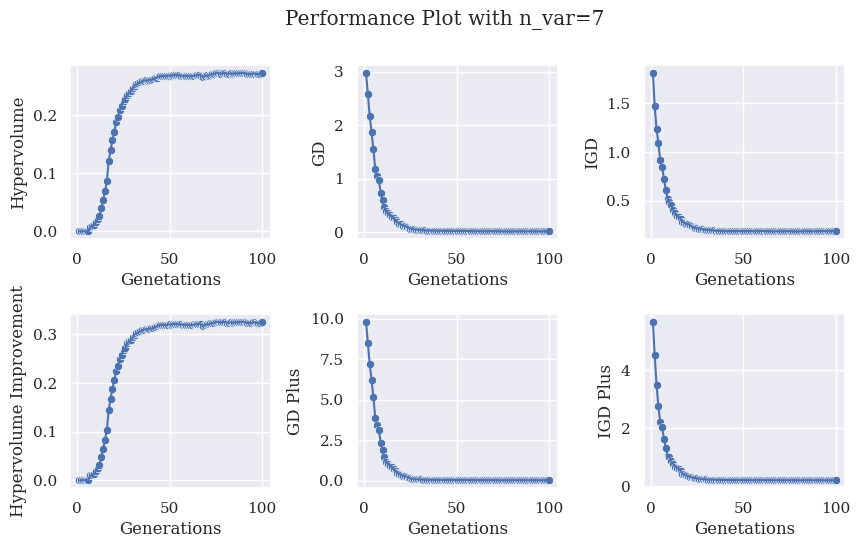

Max values of Hypervolume is 0.2731515561652025 
 , Best value of GD is 0.013210726724824476 
 , Best value of IGD is 
 0.1840468424316316 Best value of GD+ is 0.016735711103491667 , Best value of IGD+ is 0.1977480009066246


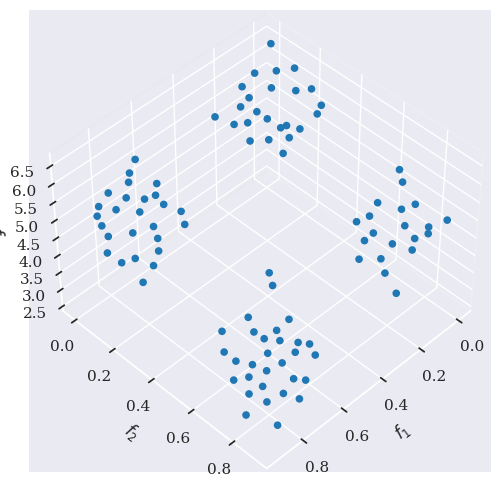

In [10]:
model_list = []
problem = DTLZ7(n_var =7)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### SPEA2 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     17 |  1.3004186387 |  2.5969697708 |  0.000000E+00 |  8.4740232237 |  3.3291255593
     2 |      200 |     23 |  1.2681235251 |  2.8584691660 |  0.000000E+00 |  9.4521903797 |  3.2276666032
     3 |      300 |     39 |  0.9978818012 |  2.4539403722 |  0.000000E+00 |  8.1173849976 |  2.3577452977
     4 |      400 |     37 |  0.8309300033 |  1.9291832522 |  0.000000E+00 |  6.3333410970 |  2.1562911289
     5 |      500 |     31 |  0.6500416790 |  1.6491898271 |  0.000000E+00 |  5.3909095397 |  1.7330275543
     6 |      600 |     33 |  0.5430877617 |  1.1598215825 |  0.000000E+00 |  3.7023627290 |  1.0085444487
     7 |      700 |     36 |  0.4148568804 |  0.7231687392 |  0.000000E+00 |  2.1723464066 |  0.8440521085
     8 |      800 |     42 |  0.3464732937 |  0.7013614325 |  0.000000E+00 |  2.1590541807 |  0.6368693837
     9 |      900 |     50 |  0.30271

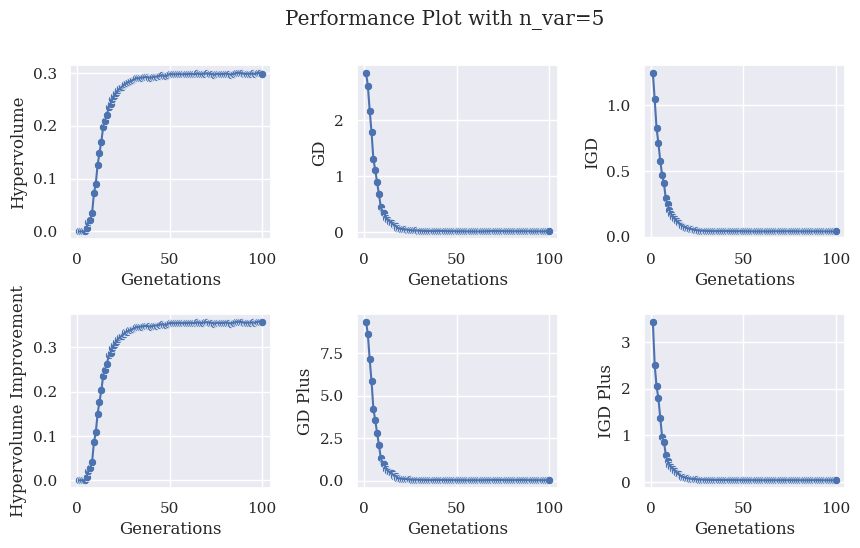

Max values of Hypervolume is 0.3003233373719719 
 , Best value of GD is 0.016388310487029746 
 , Best value of IGD is 
 0.03934292676096969 Best value of GD+ is 0.0181044024271027 , Best value of IGD+ is 0.03165231150548915


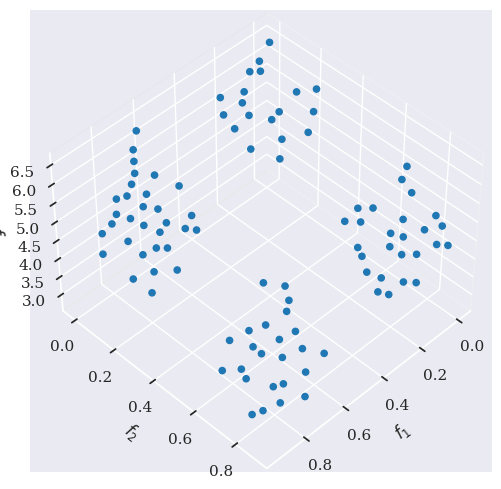

In [11]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = SPEA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  1.1987404332 |  2.6398125316 |  0.000000E+00 |  8.6557870192 |  3.4692024612
     2 |      200 |     24 |  1.1385482662 |  2.1173180234 |  0.000000E+00 |  6.8761420598 |  3.3251216890
     3 |      300 |     31 |  0.8541311012 |  1.8508639099 |  0.000000E+00 |  6.0369380193 |  2.1590083647
     4 |      400 |     32 |  0.7144837750 |  1.9635059131 |  0.000000E+00 |  6.4354908709 |  1.8916687294
     5 |      500 |     31 |  0.5120654263 |  1.5554990375 |  0.0127336865 |  5.0150774095 |  1.0202090138
     6 |      600 |     31 |  0.4567267147 |  1.7432509755 |  0.0127336865 |  5.6351959311 |  0.9392603650
     7 |      700 |     42 |  0.4355904695 |  1.3160864776 |  0.0137104036 |  4.1440810395 |  0.9375648832
     8 |      800 |     47 |  0.4142088337 |  1.3085340610 |  0.0168511077 |  4.1138259769 |  0.9012226207
     9 |      900 |     54 |  0.37062

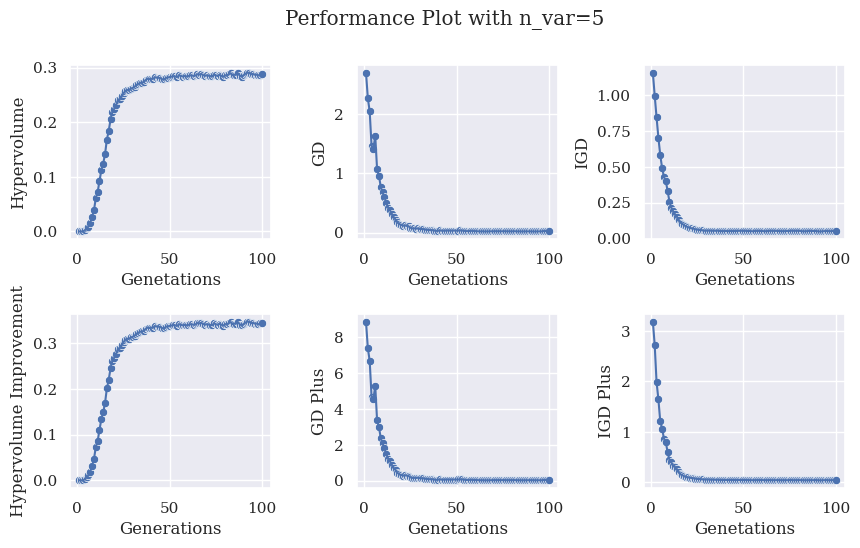

Max values of Hypervolume is 0.29091105541687 
 , Best value of GD is 0.01795416486097324 
 , Best value of IGD is 
 0.04968572995434822 Best value of GD+ is 0.018430760751717325 , Best value of IGD+ is 0.03791765777716655


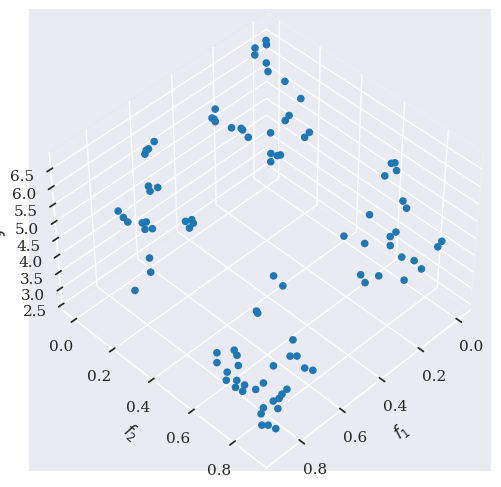

In [12]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     15 |  1.5053955604 |  2.7772551449 |  0.000000E+00 |  9.0825531122 |  3.9942365287
     2 |      200 |     24 |  1.3628543561 |  2.7497088874 |  0.000000E+00 |  9.0112732035 |  3.5940691666
     3 |      300 |     12 |  1.0931608270 |  2.9872223179 |  0.000000E+00 |  9.8463599743 |  3.0951935986
     4 |      400 |     20 |  0.8221961623 |  2.0823209345 |  0.000000E+00 |  6.7289076474 |  1.5797345731
     5 |      500 |     21 |  0.6773433512 |  1.6087332095 |  0.000000E+00 |  5.1668110888 |  1.5688207149
     6 |      600 |     18 |  0.6632707419 |  1.1156214110 |  0.000000E+00 |  3.5083838843 |  1.5658438786
     7 |      700 |     19 |  0.5547906478 |  0.9781343156 |  0.000000E+00 |  2.9936115304 |  1.2578201318
     8 |      800 |     25 |  0.3814999223 |  0.8719909469 |  0.0014436627 |  2.7229264414 |  0.6643912530
     9 |      900 |     38 |  0.32617

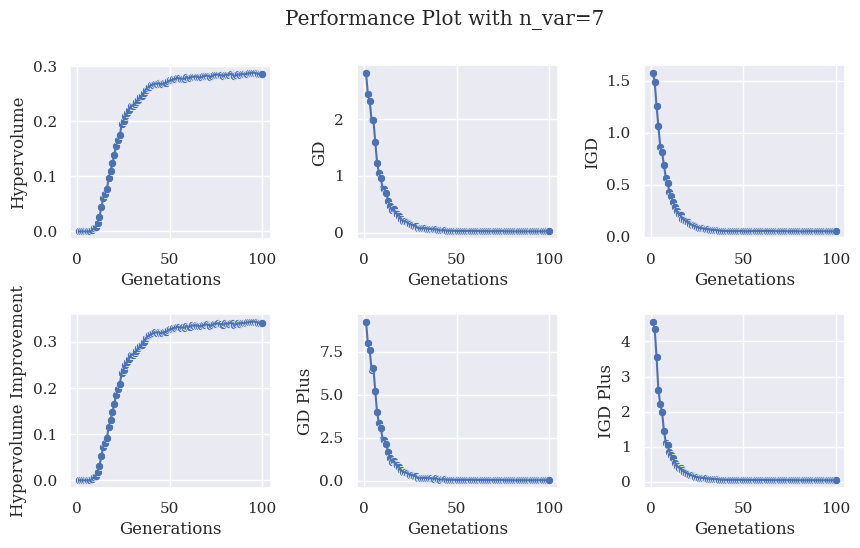

Max values of Hypervolume is 0.2879087096229148 
 , Best value of GD is 0.0193407358956417 
 , Best value of IGD is 
 0.04990102484592373 Best value of GD+ is 0.022350740225716762 , Best value of IGD+ is 0.03901463440564085


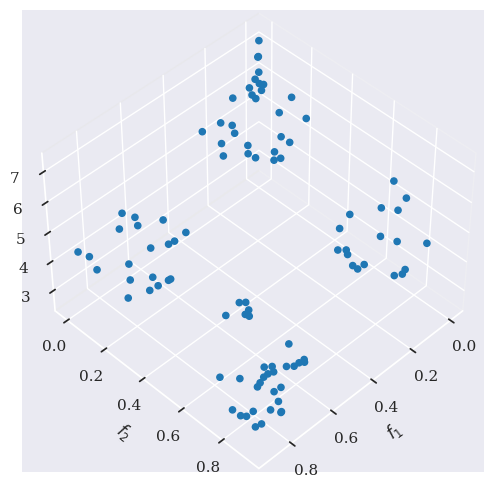

In [13]:
model_list = []
problem = DTLZ7(n_var =7)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA2 with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     15 |  2.0474766951 |  2.8114964988 |  0.000000E+00 |  9.2557744365 |  6.5264935521
     2 |      200 |     17 |  1.9133802216 |  2.5404338742 |  0.000000E+00 |  8.2927068723 |  5.9183771467
     3 |      300 |     18 |  1.4450398063 |  2.4329601611 |  0.000000E+00 |  7.9674458792 |  4.0448235110
     4 |      400 |     20 |  1.3122888323 |  2.2443859035 |  0.000000E+00 |  7.4287860814 |  3.8855432140
     5 |      500 |     23 |  1.2394018902 |  1.7742100366 |  0.000000E+00 |  5.7919448532 |  3.6378389212
     6 |      600 |     24 |  1.0327615054 |  1.3423958365 |  0.000000E+00 |  4.3196142248 |  2.4749705837
     7 |      700 |     37 |  0.8682084553 |  1.4021130758 |  0.000000E+00 |  4.4963207989 |  1.7103702107
     8 |      800 |     28 |  0.7839535724 |  1.2111430181 |  3.437937E-06 |  3.7633047879 |  1.5217320054
     9 |      900 |     33 |  0.69726

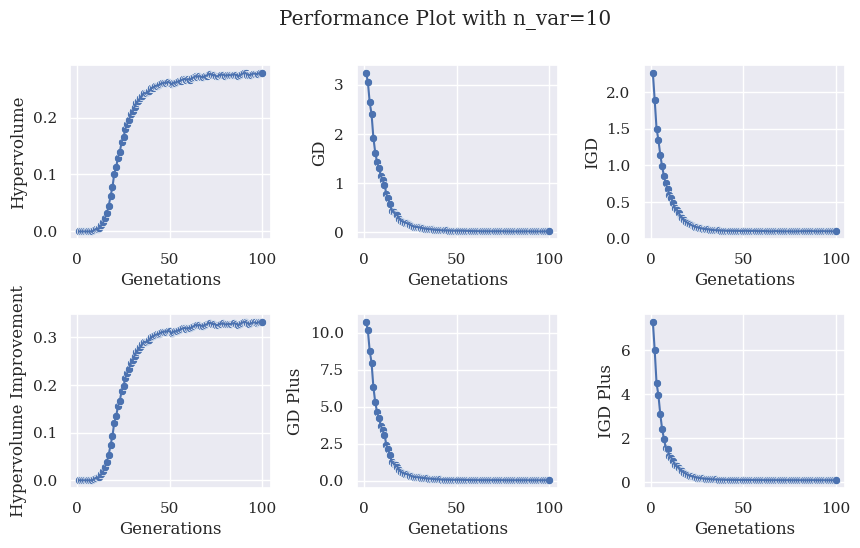

Max values of Hypervolume is 0.2786898146121435 
 , Best value of GD is 0.017375877067800898 
 , Best value of IGD is 
 0.09801801559811898 Best value of GD+ is 0.0189049278759161 , Best value of IGD+ is 0.07909335851139962


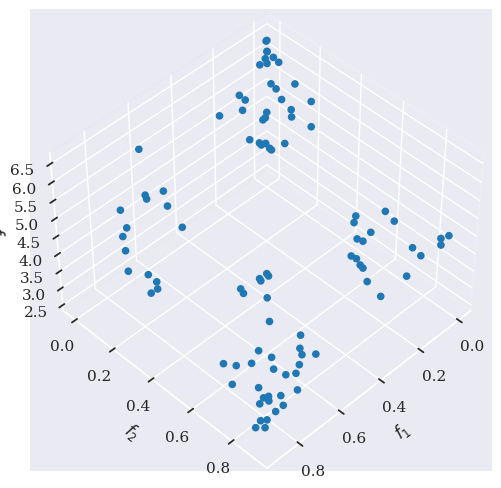

In [14]:
model_list = []
problem = DTLZ7(n_var =10)
algorithm = NSGA2(pop_size=100)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

In [15]:
from pymoo.util.ref_dirs import get_reference_directions
ref_dirs = get_reference_directions('energy',3,100,seed=1)

#### MOEAD with nvar5

In [16]:
from pymoo.algorithms.moo.moead import MOEAD

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     13 |  1.5506696008 |  3.1756976003 |  0.000000E+00 |  1.048973E+01 |  4.9244470750
     2 |      200 |     79 |  0.9768310151 |  0.3313733853 |  0.000000E+00 |  1.0671680061 |  2.3653771210
     3 |      300 |     48 |  0.7612202672 |  0.1180609152 |  0.000000E+00 |  0.2003364684 |  1.3929506371
     4 |      400 |     36 |  0.7583914264 |  0.0059639987 |  0.0642694779 |  0.0087422858 |  1.1257923046
     5 |      500 |     78 |  0.6398728721 |  0.0039558882 |  0.1408804421 |  0.0063011762 |  0.8330700046
     6 |      600 |     61 |  0.5954494197 |  0.0041902994 |  0.1702200157 |  0.0061062858 |  0.7300896694
     7 |      700 |     88 |  0.5442944823 |  0.0063211280 |  0.1822409526 |  0.0047730348 |  0.6989365884
     8 |      800 |     87 |  0.5373145734 |  0.0058145886 |  0.1932884572 |  0.0051264082 |  0.6958086440
     9 |      900 |     91 |  0.51743

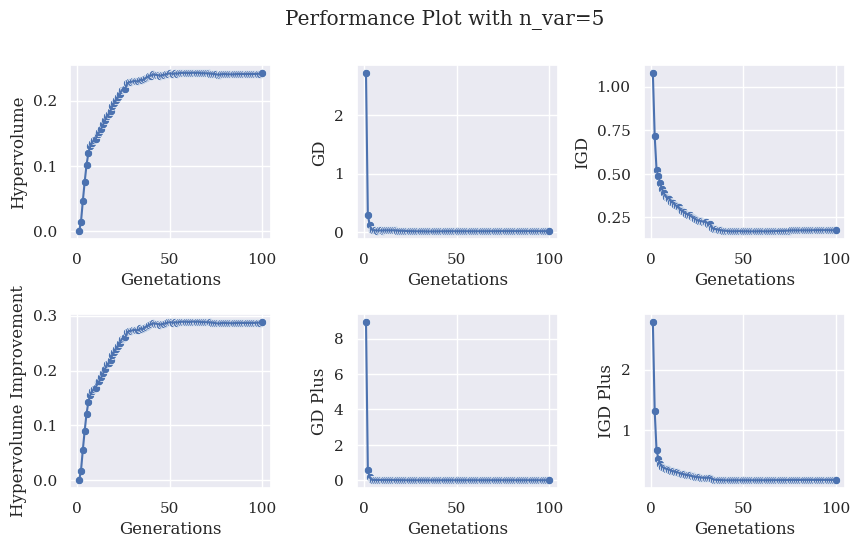

Max values of Hypervolume is 0.24258652681240617 
 , Best value of GD is 0.009691853543386902 
 , Best value of IGD is 
 0.1691347826608053 Best value of GD+ is 0.007538171881189595 , Best value of IGD+ is 0.18160279368790322


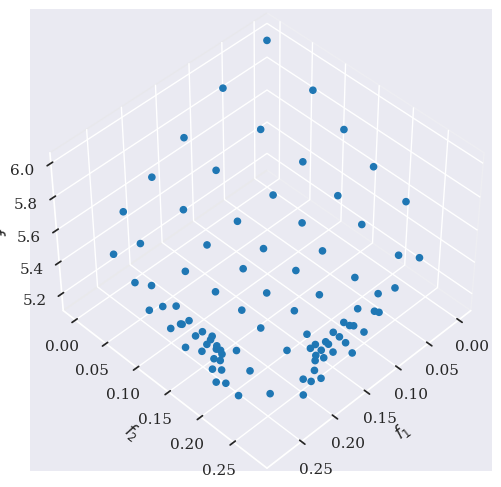

In [17]:
model_list = []
problem = DTLZ7(n_var =5)
algorithm = MOEAD(ref_dirs = ref_dirs)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### MOEAD with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  1.8664516127 |  2.8836404693 |  0.000000E+00 |  9.5216300357 |  5.7766513621
     2 |      200 |     67 |  0.7859209709 |  0.3141760054 |  0.000000E+00 |  0.7239902759 |  1.8059228403
     3 |      300 |     56 |  0.6414652793 |  0.1565438029 |  0.0614077823 |  0.2312773293 |  1.0718717505
     4 |      400 |     52 |  0.5981411300 |  0.0871725632 |  0.0910498373 |  0.1242197243 |  0.9599876194
     5 |      500 |     70 |  0.5465630566 |  0.0492169570 |  0.1406393774 |  0.0742550625 |  0.7907275289
     6 |      600 |     74 |  0.5622910771 |  0.0191653571 |  0.1651307691 |  0.0287088583 |  0.7382913480
     7 |      700 |     70 |  0.5594105551 |  0.0148131022 |  0.1724594730 |  0.0210509276 |  0.7126924671
     8 |      800 |     79 |  0.5578226971 |  0.0089352729 |  0.1742561462 |  0.0131598498 |  0.7104578674
     9 |      900 |     84 |  0.54549

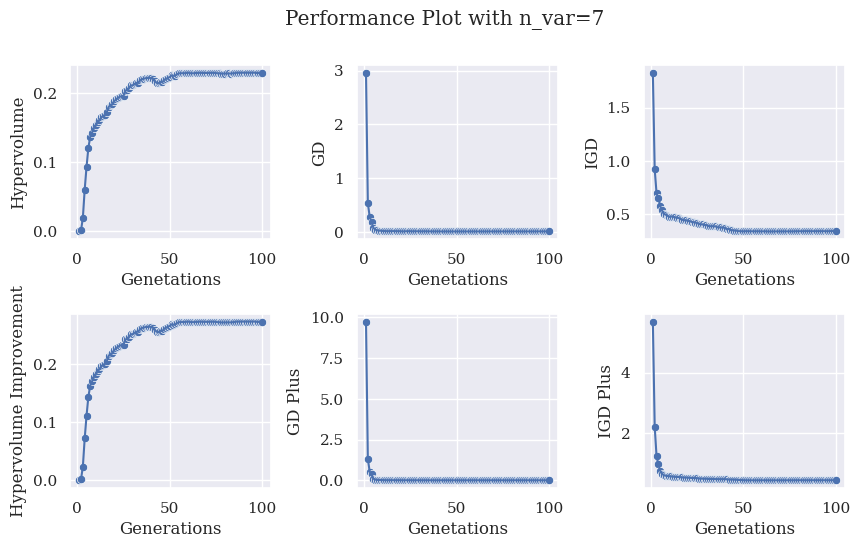

Max values of Hypervolume is 0.22944618147634815 
 , Best value of GD is 0.009762033336713579 
 , Best value of IGD is 
 0.3403939572589572 Best value of GD+ is 0.0068681929526338255 , Best value of IGD+ is 0.4190293392129987


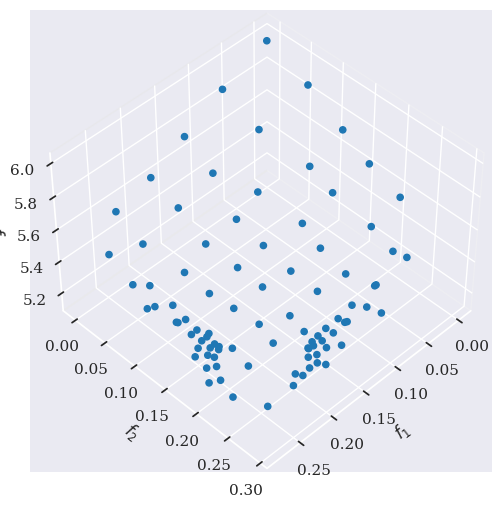

In [18]:
model_list = []
problem = DTLZ7(n_var =7)
algorithm = MOEAD(ref_dirs = ref_dirs)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### MOEAD with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     14 |  1.9501230136 |  2.7892687537 |  0.000000E+00 |  9.1460652902 |  6.3044375474
     2 |      200 |     56 |  1.2230791517 |  1.1003520326 |  0.000000E+00 |  2.9735014564 |  3.0493803401
     3 |      300 |     53 |  0.8838855242 |  0.4942766473 |  0.000000E+00 |  1.2067281373 |  1.6494001051
     4 |      400 |     66 |  0.7234447429 |  0.3920744344 |  0.0014932933 |  0.7161218693 |  1.1623579907
     5 |      500 |     43 |  0.6096775482 |  0.3576906412 |  0.0079266989 |  0.6610163446 |  0.8978072663
     6 |      600 |     53 |  0.5286596987 |  0.2053329785 |  0.0233024925 |  0.2588946932 |  0.6361872835
     7 |      700 |     73 |  0.4615274291 |  0.0954392929 |  0.0581224002 |  0.0930970421 |  0.4360680693
     8 |      800 |     52 |  0.4251996616 |  0.0528301870 |  0.0647012885 |  0.0455604307 |  0.3973466678
     9 |      900 |     85 |  0.41967

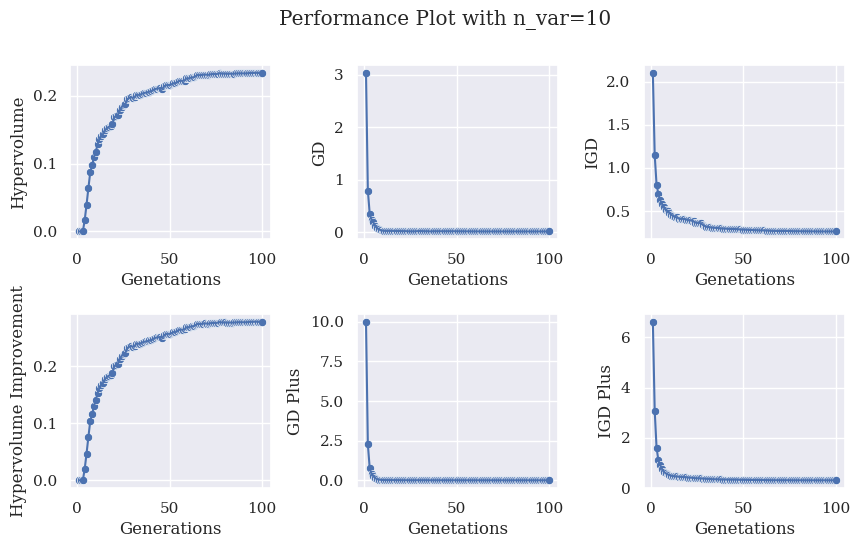

Max values of Hypervolume is 0.23393334412198302 
 , Best value of GD is 0.011540003882125395 
 , Best value of IGD is 
 0.25979533077762224 Best value of GD+ is 0.008672841601698806 , Best value of IGD+ is 0.3042510135359947


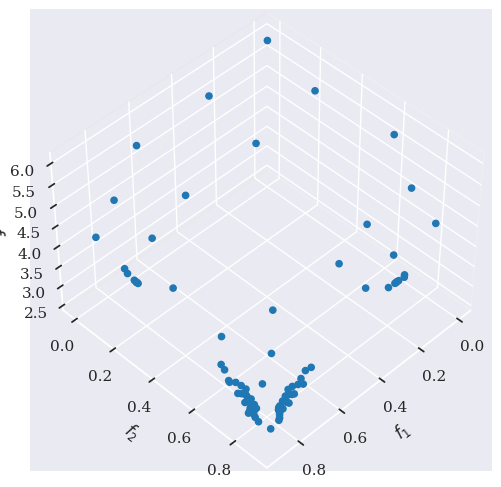

In [20]:
model_list = []
problem = DTLZ7(n_var =10)
algorithm = MOEAD(ref_dirs = ref_dirs)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar5

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     11 |  1.0874625164 |  3.2221748257 |  0.000000E+00 |  1.062656E+01 |  2.9072174043
     2 |      200 |      9 |  1.0721014505 |  1.6574906081 |  0.000000E+00 |  5.2376738612 |  2.9072174043
     3 |      300 |     11 |  0.7818785090 |  1.7474018485 |  0.000000E+00 |  5.7202425397 |  1.8924481537
     4 |      400 |     14 |  0.6397336825 |  1.1547333518 |  0.0000954886 |  3.6494539380 |  1.5729948666
     5 |      500 |     15 |  0.5821638732 |  1.1783312002 |  0.0000954886 |  3.7644239293 |  1.1853631478
     6 |      600 |     19 |  0.5915971339 |  0.7719437902 |  0.0000954886 |  2.4058473098 |  1.1906175769
     7 |      700 |     15 |  0.5294376064 |  0.9949550244 |  0.0000954886 |  3.2267477798 |  1.1723524990
     8 |      800 |     21 |  0.5331852253 |  0.9088906896 |  0.0000954886 |  2.9330839031 |  1.1753084314
     9 |      900 |     19 |  0.53632

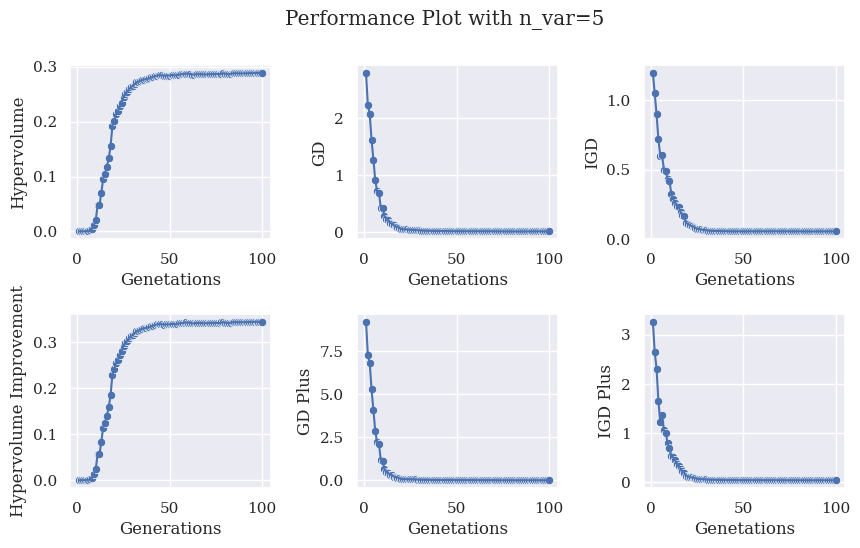

Max values of Hypervolume is 0.28903418292360156 
 , Best value of GD is 0.00957310126498526 
 , Best value of IGD is 
 0.053885286102052024 Best value of GD+ is 0.007547964507973778 , Best value of IGD+ is 0.041200422305807206


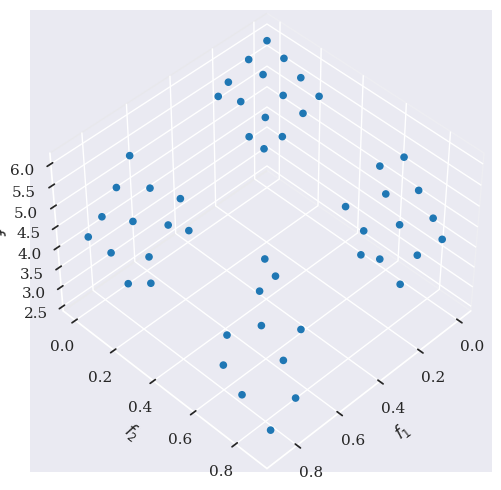

In [21]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ7(n_var =5)
algorithm = NSGA3(ref_dirs = ref_dirs)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar5 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=5')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=5)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar7

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  1.5238881494 |  2.9593733571 |  0.000000E+00 |  9.7841138682 |  4.7446672844
     2 |      200 |     18 |  1.3509323646 |  2.5526557109 |  0.000000E+00 |  8.3666546084 |  3.9496792891
     3 |      300 |     23 |  1.3509302632 |  2.3191741165 |  0.000000E+00 |  7.5935427089 |  3.9496792891
     4 |      400 |     22 |  1.1266838932 |  2.4065767941 |  0.000000E+00 |  7.9848038502 |  2.9593002647
     5 |      500 |     11 |  0.9225837930 |  1.0918862295 |  0.000000E+00 |  3.3750489105 |  2.6625381127
     6 |      600 |     17 |  0.8226155993 |  1.2334845922 |  0.000000E+00 |  3.9511173290 |  2.0627896197
     7 |      700 |     16 |  0.7271029517 |  1.1004080555 |  0.000000E+00 |  3.5667209866 |  1.5956628745
     8 |      800 |     14 |  0.6874184967 |  0.8266617344 |  0.000000E+00 |  2.6658222400 |  1.9720634198
     9 |      900 |      9 |  0.54793

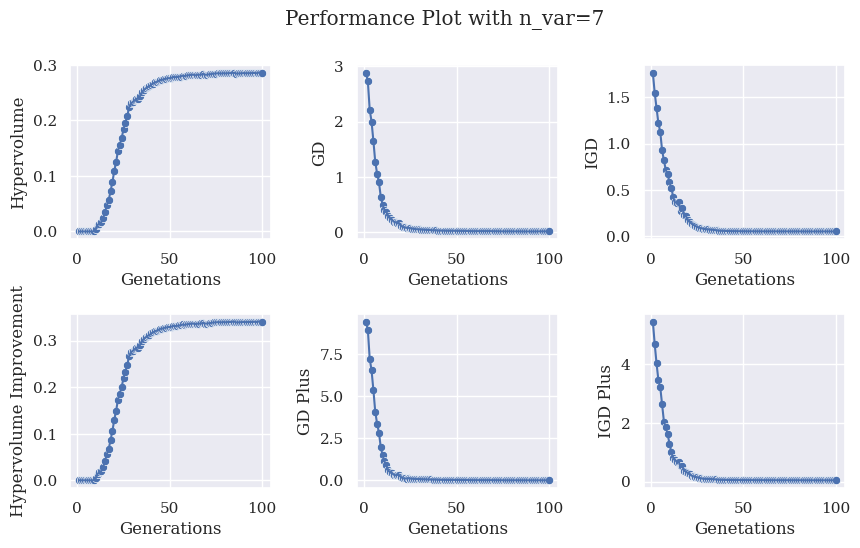

Max values of Hypervolume is 0.286119540194693 
 , Best value of GD is 0.01015526232517568 
 , Best value of IGD is 
 0.054380081501767596 Best value of GD+ is 0.010224291648878146 , Best value of IGD+ is 0.04251101207039593


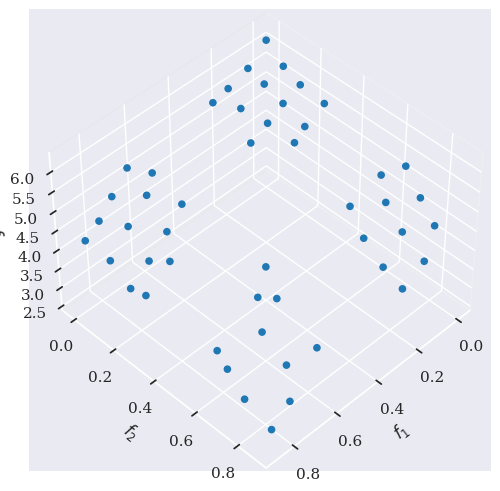

In [22]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ7(n_var =7)
algorithm = NSGA3(ref_dirs = ref_dirs)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar7 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=7')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=7)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()

#### NSGA3 with nvar10

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |      100 |     16 |  2.0185859214 |  3.0395040581 |  0.000000E+00 |  9.9887805316 |  6.3172822777
     2 |      200 |     13 |  1.9877883828 |  2.4006216683 |  0.000000E+00 |  7.7166713115 |  6.3172822777
     3 |      300 |     12 |  1.5546846383 |  2.1923067196 |  0.000000E+00 |  7.0721147300 |  4.7134133368
     4 |      400 |     16 |  1.2854699404 |  2.1589792067 |  0.000000E+00 |  7.1320280793 |  3.6065267718
     5 |      500 |     15 |  0.8230580506 |  1.5171361017 |  0.000000E+00 |  4.8924526493 |  1.7912148515
     6 |      600 |     20 |  0.7609783495 |  1.4195326948 |  0.0014848335 |  4.5748146447 |  1.4675418822
     7 |      700 |     11 |  0.6953298156 |  1.2142522803 |  0.0014848335 |  3.9231975986 |  1.4675418822
     8 |      800 |     13 |  0.6931023820 |  0.8358801301 |  0.0014848335 |  2.6178364030 |  1.4675418822
     9 |      900 |      8 |  0.60010

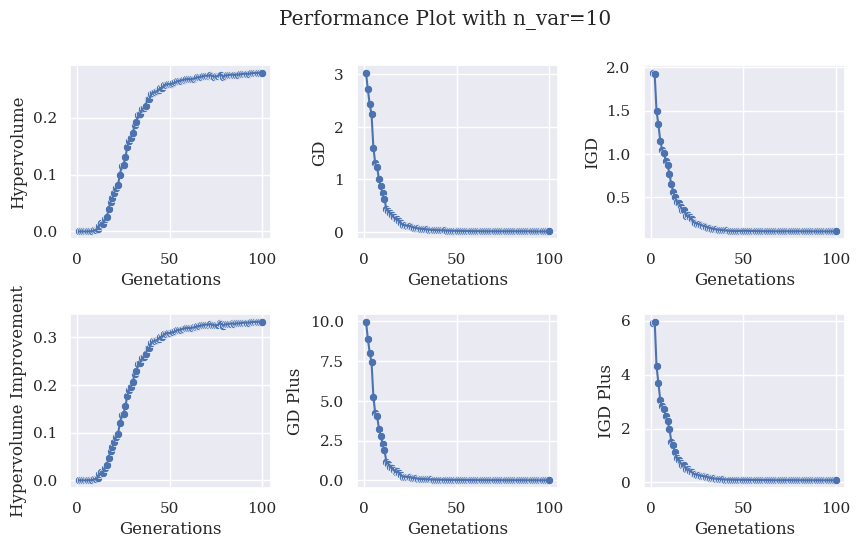

Max values of Hypervolume is 0.27904434773947095 
 , Best value of GD is 0.00879618445061062 
 , Best value of IGD is 
 0.10245680927746328 Best value of GD+ is 0.009663822095641714 , Best value of IGD+ is 0.08048334057614479


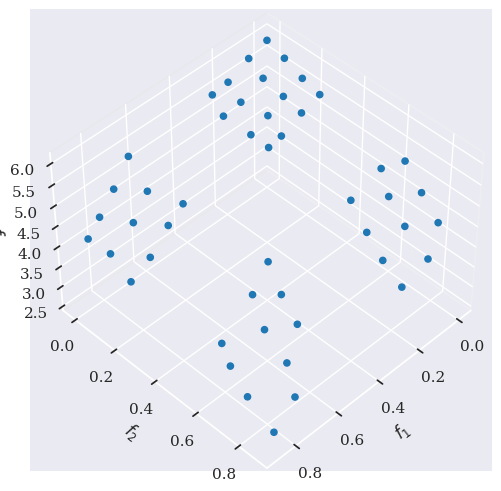

In [23]:
from pymoo.algorithms.moo.nsga3 import NSGA3
model_list = []
problem = DTLZ7(n_var =10)
algorithm = NSGA3(ref_dirs = ref_dirs)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]
data_avg_hyp_percent_improvement = [i/Hypervolume_nvar10 for i in data_avg_hyp_improvement ]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams["figure.figsize"] = [10.00, 5.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(2,3)
fig.suptitle('Performance Plot with n_var=10')
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.725, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0,0])
axes[0,0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[0,1])
axes[0,1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[0,2])
axes[0,2].set(xlabel='Genetations',ylabel='IGD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_percent_improvement,ax=axes[1,0])
axes[1,0].set(xlabel='Generations',ylabel='Hypervolume Improvement')

fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[1,1])
axes[1,1].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1,2])
axes[1,2].set(xlabel='Genetations',ylabel='IGD Plus')



plt.show()
print('Max values of Hypervolume is {0} \n , Best value of GD is {1} \n , Best value of IGD is \n {2} Best value of GD+ is {3} , Best value of IGD+ is {4}'.format(max(data_avg_hyp_improvement),min(data_avg_gd_improvement),min(data_avg_igd_improvement),min(data_avg_gdplus_improvement),min(data_avg_igdplus_improvement)))
problem = DTLZ7(n_var=10)
original_pareto_front = problem.pareto_front()
#plt.xlabel("Objective 1")
#plt.ylabel("Objective 2")
Scatter().add(original_pareto_front).show()
Scatter().add(model_list[0].F).show()
#plt.show()